<a href="https://colab.research.google.com/github/JasmankaurBal/SCT_ML_1/blob/main/linear_regression_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!rm kaggle\ \(1\).json


Upload your kaggle.json API key file:


Saving kaggle.json to kaggle (4).json
house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
Dataset loaded successfully! Here are first 5 rows:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    Na

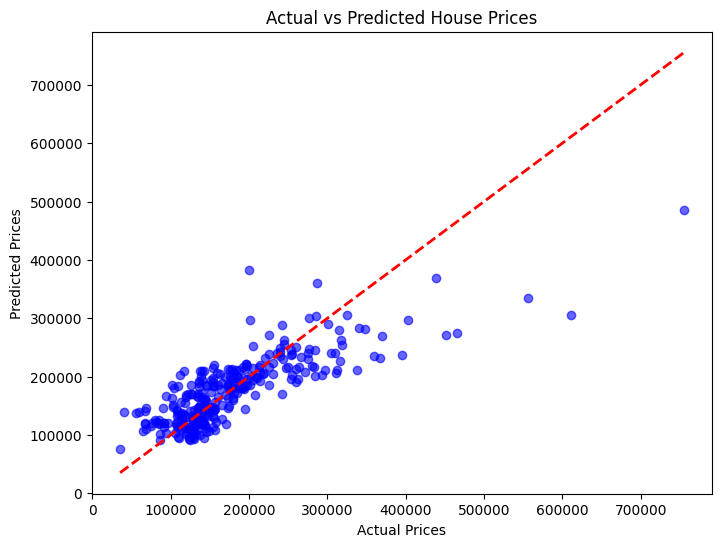

In [17]:

#  Install Kaggle Library

!pip install kaggle

#  Upload Kaggle API Key

from google.colab import files
print("Upload your kaggle.json API key file:")
files.upload()  # Choose your kaggle.json here


#  Move API Key to Correct Location

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


 Download Kaggle Dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip -o house-prices-advanced-regression-techniques.zip

Load Dataset
import pandas as pd

data = pd.read_csv('train.csv')
print("Dataset loaded successfully! Here are first 5 rows:")
print(data.head())

#  Select Relevant Features
#  price prediction using
# square footage, bedrooms, and bathrooms
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

#  Split Data into Training and Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Train Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predict & Evaluate
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#  Visualize Predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


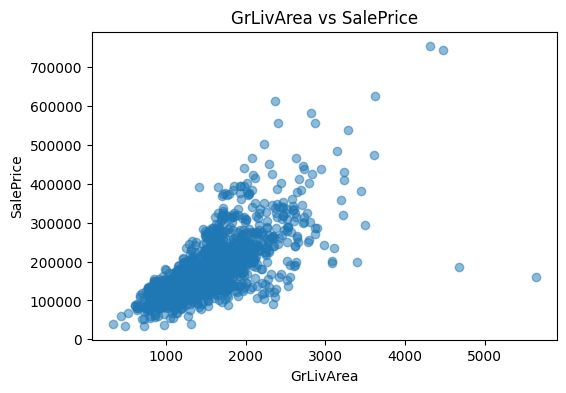

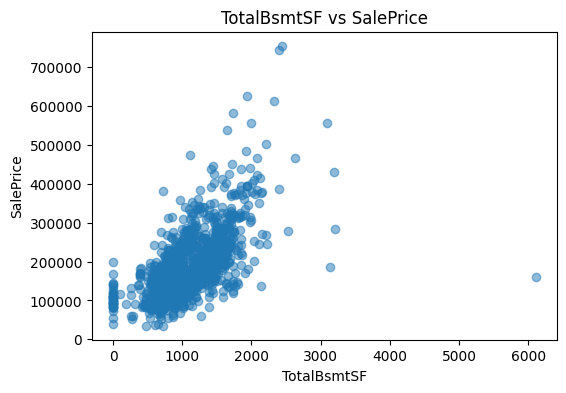

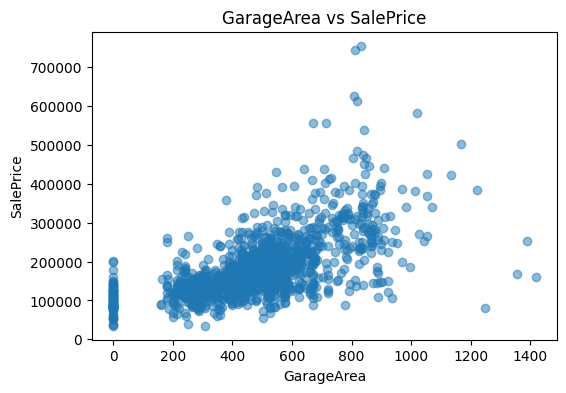

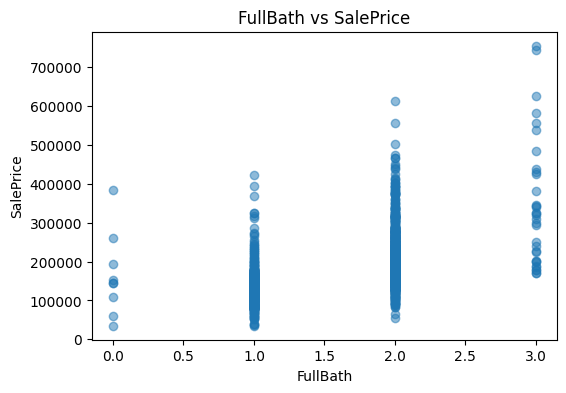

In [11]:
features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'FullBath']
for feature in features:
    plt.figure(figsize=(6,4))
    plt.scatter(data[feature], data['SalePrice'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(f"{feature} vs SalePrice")
    plt.show()


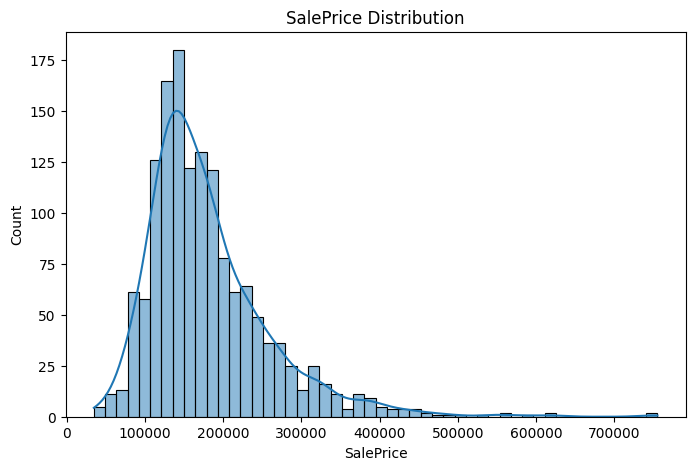

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data['SalePrice'], bins=50, kde=True)
plt.title("SalePrice Distribution")
plt.show()


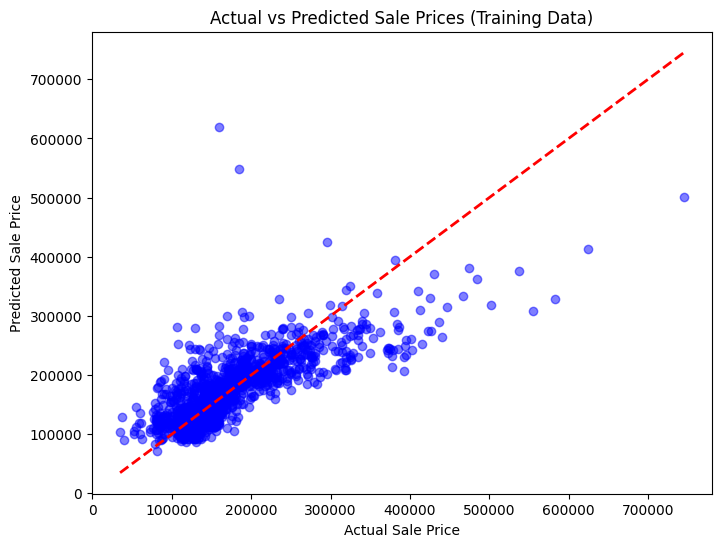

In [14]:
#  Actual vs Predicted Plot (Training Data)
y_pred_train = model.predict(X_train)

plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices (Training Data)")
plt.show()